In [58]:
#function tokenisasi
def tokenisasi(text):
    tokens = text.split(" ")
    return tokens

#function stemming
def stemming(text):
    from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
    # create stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    # stemming process
    output = stemmer.stem(text)
    return output

#function stemming sentence
def stemming_sentence(text):
    output = ""
    for token in tokenisasi(text):
        output = output + stemming(token) + " "
    return output[:-1]

doc_dict_raw = {}
doc_dict_raw['doc1']="pengembangan sistem informasi penjadwalan"
doc_dict_raw['doc2']="pengembangan model analisis sentimen berita"
doc_dict_raw['doc3'] = "analisis sistem input output"
doc_dict_raw['doc4'] = "pengembangan sistem informasi akademik universitas"
doc_dict_raw['doc5'] = "pengembangan sistem cari berita ekonomi"
doc_dict_raw['doc6'] = "analisis sistem neraca nasional"
doc_dict_raw['doc7'] = "pengembangan sistem informasi layanan statistik"
doc_dict_raw['doc8'] = "pengembangan sistem pencarian skripsi di universitas"
doc_dict_raw['doc9'] = "analisis sentimen publik terhadap pemerintah"
doc_dict_raw['doc10'] = "pengembangan model klasifikasi sentimen berita"

doc_dict ={}
for doc_id,doc in doc_dict_raw.items():
    doc_dict[doc_id]=stemming_sentence(doc)
print(doc_dict)


{'doc1': 'kembang sistem informasi jadwal', 'doc2': 'kembang model analisis sentimen berita', 'doc3': 'analisis sistem input output', 'doc4': 'kembang sistem informasi akademik universitas', 'doc5': 'kembang sistem cari berita ekonomi', 'doc6': 'analisis sistem neraca nasional', 'doc7': 'kembang sistem informasi layan statistik', 'doc8': 'kembang sistem cari skripsi di universitas', 'doc9': 'analisis sentimen publik hadap perintah', 'doc10': 'kembang model klasifikasi sentimen berita'}


In [59]:
vocab = []
inverted_index= {}
for doc_id, doc in doc_dict.items():
    for token in tokenisasi(doc):
        print(token)
        if token not in vocab:
            vocab.append(token)
            inverted_index[token] = []
        if token in inverted_index:
            if doc_id not in inverted_index[token]:
                inverted_index[token].append(doc_id)
#print(vocab)

print(doc_dict)

kembang
sistem
informasi
jadwal
kembang
model
analisis
sentimen
berita
analisis
sistem
input
output
kembang
sistem
informasi
akademik
universitas
kembang
sistem
cari
berita
ekonomi
analisis
sistem
neraca
nasional
kembang
sistem
informasi
layan
statistik
kembang
sistem
cari
skripsi
di
universitas
analisis
sentimen
publik
hadap
perintah
kembang
model
klasifikasi
sentimen
berita
{'doc1': 'kembang sistem informasi jadwal', 'doc2': 'kembang model analisis sentimen berita', 'doc3': 'analisis sistem input output', 'doc4': 'kembang sistem informasi akademik universitas', 'doc5': 'kembang sistem cari berita ekonomi', 'doc6': 'analisis sistem neraca nasional', 'doc7': 'kembang sistem informasi layan statistik', 'doc8': 'kembang sistem cari skripsi di universitas', 'doc9': 'analisis sentimen publik hadap perintah', 'doc10': 'kembang model klasifikasi sentimen berita'}


In [60]:
print(len(doc_dict))

10


In [61]:
query = "sistem informasi statistik"
def termFrequency(vocab, query):
    tf_query = {}
    for word in vocab:
        tf_query[word] = query.count(word)
    return tf_query
tf_query = termFrequency(vocab, query)
print(tf_query)

{'kembang': 0, 'sistem': 1, 'informasi': 1, 'jadwal': 0, 'model': 0, 'analisis': 0, 'sentimen': 0, 'berita': 0, 'input': 0, 'output': 0, 'akademik': 0, 'universitas': 0, 'cari': 0, 'ekonomi': 0, 'neraca': 0, 'nasional': 0, 'layan': 0, 'statistik': 1, 'skripsi': 0, 'di': 0, 'publik': 0, 'hadap': 0, 'perintah': 0, 'klasifikasi': 0}


In [62]:
def wordDocFre(vocab,doc_dict):
    df={}
    for word in vocab:
        frq = 0
        for doc in doc_dict.values():
            if word in tokenisasi(doc):
                frq=frq+1
        df[word]=frq 
    return df

In [63]:
def tfidf(vocab,tf,idf_scr,doc_dict):
    tf_idf_scr={}
    for doc_id in doc_dict.keys():
        tf_idf_scr[doc_id]={}
    for word in vocab:
        for doc_id, doc in doc_dict.items():
            tf_idf_scr[doc_id][word] = tf[doc_id][word]*idf_scr[word]
    return tf_idf_scr

In [64]:
def termFrequencyInDoc(vocab,doc_dict):
    tf_docs = {}
    for doc_id in doc_dict.keys():
        tf_docs[doc_id]={}
    
    for word in vocab:
        for doc_id, doc in doc_dict.items():
            tf_docs[doc_id][word]=doc.count(word)
    return tf_docs

In [65]:
def inverseDocFre(vocab,doc_fre,length):
    idf={}
    for word in vocab:
        idf[word]=idf[word]=1+np.log10((length+1)/(doc_fre[word]+1))
    return idf

In [66]:
import numpy as np

#menghitung df yang merupakan freq kata pada suatu dokumen 
print(wordDocFre(vocab,doc_dict))
print(inverseDocFre(vocab,wordDocFre(vocab,doc_dict),len(doc_dict)))
idf = inverseDocFre(vocab,wordDocFre(vocab,doc_dict),len(doc_dict))

# Term - Query Matrix
TQ = np.zeros((len(vocab), 1)) #hanya 1 query
length=len(doc_dict)
#idf = inverseDocFre(vocab,doc_dict,length)
for word in vocab:
    ind1 = vocab.index(word)
    TQ[ind1][0] = tf_query[word]*idf[word]
print(TQ)

#term document
tf_idf = tfidf(vocab, termFrequencyInDoc(vocab,doc_dict),inverseDocFre(vocab,wordDocFre(vocab,doc_dict),len(doc_dict)),doc_dict)



{'kembang': 7, 'sistem': 7, 'informasi': 3, 'jadwal': 1, 'model': 2, 'analisis': 4, 'sentimen': 3, 'berita': 3, 'input': 1, 'output': 1, 'akademik': 1, 'universitas': 2, 'cari': 2, 'ekonomi': 1, 'neraca': 1, 'nasional': 1, 'layan': 1, 'statistik': 1, 'skripsi': 1, 'di': 1, 'publik': 1, 'hadap': 1, 'perintah': 1, 'klasifikasi': 1}
{'kembang': 1.1383026981662814, 'sistem': 1.1383026981662814, 'informasi': 1.4393326938302626, 'jadwal': 1.7403626894942439, 'model': 1.5642714304385625, 'analisis': 1.3424226808222062, 'sentimen': 1.4393326938302626, 'berita': 1.4393326938302626, 'input': 1.7403626894942439, 'output': 1.7403626894942439, 'akademik': 1.7403626894942439, 'universitas': 1.5642714304385625, 'cari': 1.5642714304385625, 'ekonomi': 1.7403626894942439, 'neraca': 1.7403626894942439, 'nasional': 1.7403626894942439, 'layan': 1.7403626894942439, 'statistik': 1.7403626894942439, 'skripsi': 1.7403626894942439, 'di': 1.7403626894942439, 'publik': 1.7403626894942439, 'hadap': 1.7403626894942

In [67]:
TD = np.zeros((len(vocab),len(doc_dict)))
for word in vocab:
    for doc_id, doc in tf_idf.items():
        ind1 = vocab.index(word)
        ind2 = list(tf_idf.keys()).index(doc_id)
        TD[ind1][ind2] = tf_idf[doc_id][word]
print(TD)

[[1.1383027  1.1383027  0.         1.1383027  1.1383027  0.
  1.1383027  1.1383027  0.         1.1383027 ]
 [1.1383027  0.         1.1383027  1.1383027  1.1383027  1.1383027
  1.1383027  1.1383027  0.         0.        ]
 [1.43933269 0.         0.         1.43933269 0.         0.
  1.43933269 0.         0.         0.        ]
 [1.74036269 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.56427143 0.         0.         0.         0.
  0.         0.         0.         1.56427143]
 [0.         1.34242268 1.34242268 0.         0.         1.34242268
  0.         0.         1.34242268 0.        ]
 [0.         1.43933269 0.         0.         0.         0.
  0.         0.         1.43933269 1.43933269]
 [0.         1.43933269 0.         0.         1.43933269 0.
  0.         0.         0.         1.43933269]
 [0.         0.         1.74036269 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.       

In [68]:
import math
def cosine_sim(vec1,vec2):
    vec1=list(vec1)
    vec2=list(vec2)
    dot_prod=0
    for i, v in enumerate(vec1):
        dot_prod+=v*vec2[i]
    mag_1=math.sqrt(sum([x**2 for x in vec1]))
    mag_2=math.sqrt(sum([x**2 for x in vec2]))
    return dot_prod/(mag_1 * mag_2)


In [69]:
from collections import OrderedDict
def exact_top_k(doc_dict, TD, q, k):
    relevance_scores = {}
    i = 0
    for doc_id in doc_dict.keys():
        relevance_scores[doc_id] = cosine_sim(q, TD[:, i])
        i = i + 1
        
    sorted_value = OrderedDict(sorted(relevance_scores.items(), key=lambda x: x[1], reverse = True))
    top_k = {j: sorted_value[j] for j in list(sorted_value)[:k]}
    return top_k
top_2 = exact_top_k(doc_dict, TD, TQ[:, 0], 2)
top_5 = exact_top_k(doc_dict, TD, TQ[:, 0], 5)

In [78]:
query_vecs=TQ.transpose()
rel_vecs_id=["doc1","doc4","doc5","doc7","doc8"]
nrel_vecs_id=["doc2","doc3","doc6","doc9","doc10"]
rel_vecs=[]
for doc in rel_vecs_id:
    rel_vecs.append(DT[doc_ids.index(doc),:])
nrel_vecs=[]
for doc in nrel_vecs_id:
    nrel_vecs.append(DT[doc_ids.index(doc),:])

[[1.1383027  1.1383027  1.43933269 1.74036269 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [1.1383027  0.         0.         0.         1.56427143 1.34242268
  1.43933269 1.43933269 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         1.1383027  0.         0.         0.         1.34242268
  0.         0.         1.74036269 1.74036269 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [1.1383027  1.1383027  1.43933269 0.         0.         0.
  0.         0.         0.         0.         1.74036269 1.56427143
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0. 

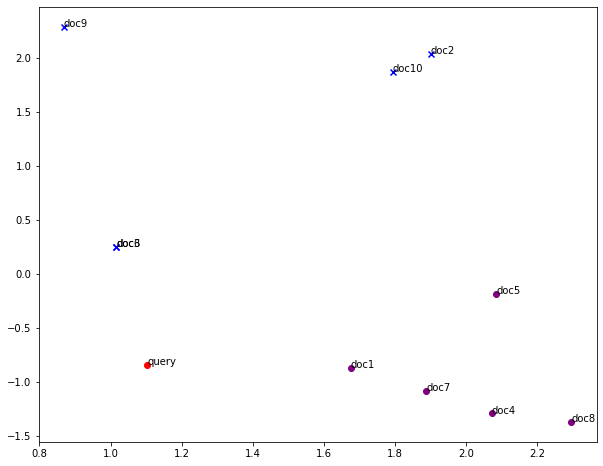

In [76]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

DT = TD.transpose()
print(DT)
model=TruncatedSVD(n_components=2,random_state=7).fit(DT)
DT_reduced=model.transform(DT)
QT_reduced = model.transform(TQ.transpose())
print(QT_reduced)
print(DT_reduced)

#plot
plt.figure(figsize=(10,8))
plt.scatter(QT_reduced[:,0],QT_reduced[:,1],color=["red"])
doc_ids=list(doc_dict.keys())
for i, txt in enumerate(doc_ids):
    plt.annotate(txt,(DT_reduced[i,0],DT_reduced[i,1]))
    if txt in rel_vecs_id:
        plt.scatter(DT_reduced[i,0],DT_reduced[i,1],marker="o",color=["purple"])
    elif txt in nrel_vecs_id:
        plt.scatter(DT_reduced[i,0],DT_reduced[i,1],marker="x",color=["blue"])
plt.annotate("query",(QT_reduced[0,0],QT_reduced[0,1]))
plt.show()

In [79]:
query_vecs=TQ.transpose()
alpha=1
beta=0.75
gamma=0.15
#update query vectors with rocchio algorithm
query_vecs=alpha * query_vecs + beta * np.mean(rel_vecs,axis=0)-gamma * np.mean(nrel_vecs,axis=0)
query_vecs[query_vecs<0]=0

In [ ]:
QT1_reduced = model.transform(query_vecs)
plt.figure(figsize=)